# EDA of DSC 20 Grades (Spring 2018)
*By [Daniel Lee](https://github.com/dleestat)*

## Introduction
DSC 20 (Programming and Basic Data Structures for Data Science) is an awesome data science course taught at UC San Diego. DSC 20 is taught using Python and a good portion of the course is spent building off of the concepts in its prerequisite course, DSC 10 (Principles of Data Science). This includes the use of the pandas library for big data processing. Course descriptions for DSC 10 and DSC 20 are [here](https://ucsd.edu/catalog/courses/DSC.html).

At the end of the course, grade breakdowns were released via CSV files (quite suitably). We were given a dataset. So of course, I'm going to analyze it.

We'll be analyzing student grades for the quarter I took this course, Spring Quarter 2018.

## Syllabus
Taken from the [syllabus](https://sites.google.com/a/eng.ucsd.edu/dsc20-spring-2018/), below is the grade breakdown used for the calculation of the final grade.

>- *30% Final Exam*
- *25% Homework Assignments*
- *15% Midterm Exam*
- *15% Labs*
- *10% Final Project*
- *5% Class Participation*

**Notes:**
- Since UCSD runs on the quarter system, the course consists of ten weeks of instruction (referred to as Week 1, Week 2, etc.). A lab and a homework assignment was assigned every week, resulting in a total of 10 lab and homework assignments. The midterm exam was held during Week 5 and the final exam after Week 10.
- Students must have scored at least a 55% on the final exam to have passed the course.
- The lowest homework score was dropped. In addition, the 10th homework assignment was optional and replaced the lowest homework score if it benefited the student.
- The lowest lab score was dropped.
- The "Class Participation" score consists of the percentage of lectures attended, monitored via iClickers. The first 6 missed lectures were dropped (i.e. not penalized for).

In [1]:
weeks = range(1,11)
final_exam_cutoff = .55

## Packages and Utilities
We'll first import and setup any relevant libraries and utilities.

In [2]:
# Alphabetical order:

from itertools import combinations  # Combinations (combinatorics)
from matplotlib.lines import Line2D

import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

from natsort import natsorted  # Natural sorting
import numpy as np

import pandas as pd
pd.set_option('display.precision',4)
pd.set_option('max_columns',30)
pd.set_option('max_colwidth',100)
pd.set_option('max_rows',8)

import re  # Regular expressions
import scipy.stats as stats
import seaborn as sns
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [3]:
%%javascript
/* Disable auto-scrolling of long cell output */
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

## Data Import and Cleaning
We'll take a look at the raw dataset `Grades.csv`, then process our dataset into the most convenient format for our analysis.

### Raw Dataset

In [4]:
df_raw = pd.read_csv('Grades.csv')
df_raw

,Secrete Code,ants_bees_score,hw1_score,hw10_score,hw2_score,hw3_score,hw4_score,hw5_score,hw6_score,hw7_score,hw8_score,hw9_score,lab01_score,lab02_score,lab03_score,lab04_score,lab05_score,lab07_score,lab08_score,lab09_score,lab10_score,lab6_score,Midterm,Final,Participation,LAB_Total,HW_Total,Weighted_Total
0,vkk236,1.08,0.78,0.8,0.86,0.90,0.96,0.86,1.00,1.00,0.80,0.88,1.0,1.0,1.0,1.0,1.0,0.1,1.0,1.0,1.0000,1.0,0.9250,1.0444,0.8889,1.0000,0.9075,0.9814
1,blcrqj,1.08,0.94,0.6,0.93,0.88,0.99,0.93,0.90,0.87,0.93,0.95,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0000,1.0,0.8375,0.9667,1.0000,1.0000,0.9312,0.9564
2,bxc522,1.08,0.97,0.0,0.84,0.91,0.99,0.93,1.00,0.92,0.99,0.96,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0000,1.0,0.9125,0.9422,1.0000,1.0000,0.9588,0.9672
3,sghvkpdq,1.00,0.99,1.0,0.68,0.86,0.84,0.88,0.96,0.96,0.41,0.83,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.8571,1.0,0.9250,0.7889,0.6667,0.9841,0.9150,0.8851
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,da005706,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0000,0.0000,0.2222,0.0000,0.0000,0.0111
145,da005732,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0000,0.0000,1.0000,0.0000,0.0000,0.0500
146,da005687,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0000,0.0000,0.7778,0.0000,0.0000,0.0389
147,da005745,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0000,0.0000,0.9259,0.0000,0.0000,0.0463


**Notes:**
- The `Grades.csv` dataset contains all scores of all students. Scores are given as decimals (out of 1) rather than percentages. The raw dataset is not ordered in any discernible way.
- The `Secrete Code` column contains enciphered versions of each student's ID (in case you're curious, my secret code is `gko011`). For privacy reasons, names and actual student ID's are not given.
- The `ants_bees_score` column contains final project scores (the final project was to program "Ants Vs. SomeBees", a customized implementation of the famous Plants vs. Zombies game).
- The `Weighted_Total` column contains final course grades.

### Cleaning

In [7]:
# Sort by Weighted_Total
df = df_raw.sort_values('Weighted_Total', ascending=False).reset_index(drop=True)
df.index += 1

# Add tuples of HW and Lab scores
hw_cols = natsorted(filter(re.compile('hw\d+_score').match, df.columns))
lab_cols = natsorted(filter(re.compile('lab\d+_score').match, df.columns))
df['HW'] = df[hw_cols].apply(lambda row: tuple(row), axis=1)
df['Lab'] = df[lab_cols].apply(lambda row: tuple(row), axis=1)

# Select and rename columns
df = df[['Secrete Code','Weighted_Total','Final','Midterm','HW_Total','LAB_Total','ants_bees_score','Participation','HW','Lab']]
df.rename({'Secrete Code':'ID','Weighted_Total':'Total','HW_Total':'HW_Avg','LAB_Total':'Lab_Avg','ants_bees_score':'Project'}, axis=1, inplace=True)
df

,ID,Total,Final,Midterm,HW_Avg,Lab_Avg,Project,Participation,HW,Lab
1,vkb218,1.0229,1.0778,0.9750,0.9813,1.0000,1.08,1.0000,"(1.0, 0.65, 0.98, 0.99, 0.93, 0.96, 0.98, 0.96, 0.98, 1.0)","(1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0)"
2,gko011,1.0225,1.0889,0.9375,0.9888,1.0000,1.08,1.0000,"(1.0, 0.95, 0.98, 0.92, 1.0, 1.0, 0.96, 0.99, 0.98, 1.0)","(1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0)"
3,zhc195,1.0097,1.1222,0.9375,0.9295,1.0000,1.00,1.0000,"(0.82, 0.91, 0.92, 0.97, 0.96, 0.99, 0.92, 0.9259999999999999, 0.84, 0.0)","(1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0)"
4,mprxo,1.0046,1.1144,0.8875,0.9487,1.0000,1.00,1.0000,"(0.93, 0.89, 0.89, 0.97, 0.99, 1.0, 0.98, 0.86, 0.94, 0.0)","(1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0)"
...,...,...,...,...,...,...,...,...,...,...
145,golx9999,0.0207,0.0000,0.0000,0.0000,0.1111,0.04,0.0000,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)","(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0)"
146,svsdkzd,0.0167,0.0000,0.0000,0.0000,0.1111,0.00,0.0000,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)","(1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)"
147,blk317,0.0167,0.0000,0.0000,0.0000,0.1111,0.00,0.0000,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)","(1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)"
148,da005706,0.0111,0.0000,0.0000,0.0000,0.0000,0.00,0.2222,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)","(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)"


In [8]:
highlight = lambda row: ['background: lightyellow' if row.name == 120 
                         else 'background: seashell' if row.name > 123
                         else 'background: honeydew' for i in row]
df.loc[118:125].style.apply(highlight, axis=1)

,ID,Total,Final,Midterm,HW_Avg,Lab_Avg,Project,Participation,HW,Lab
118,jvfkzduw,0.657,0.5678,0.9,0.4088,0.7,1,0.8889,"(0.71, 0.09, 0.61, 0.29, 0.54, 0.89, 0.14, 0.0, 0.0, 0.0)","(0.0, 1.0, 0.0, 1.0, 0.7, 1.0, 1.0, 0.6, 0.0, 1.0)"
119,b2pd,0.6455,0.4822,0.6125,0.65,0.9722,0.58,0.8519,"(0.65, 0.38, 0.86, 0.8, 0.0, 0.86, 0.96, 0.0, 0.69, 0.0)","(1.0, 1.0, 0.75, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.5714285714285714)"
120,qlo021,0.6308,0,0.975,0.8494,1,1,0.4444,"(0.815, 0.53, 0.87, 0.97, 0.92, 0.92, 0.38, 0.93, 0.84, 0.0)","(1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0)"
121,h3vdqwrv,0.6228,0.3244,0.4875,0.6825,0.8905,1,0.963,"(0.89, 0.5, 0.73, 0.73, 0.52, 0.67, 0.9, 0.16, 0.52, 0.0)","(1.0, 1.0, 1.0, 1.0, 0.7, 1.0, 1.0, 0.6, 0.3, 0.7142857142857143)"
122,clt016,0.6132,0.3033,0.7375,0.6475,0.9194,0.84,0.5556,"(0.62, 0.43, 0.69, 0.78, 0.79, 0.93, 0.24, 0.0, 0.7, 0.0)","(0.4, 1.0, 0.875, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0)"
123,uxihl,0.5687,0.2667,0.2625,0.7375,0.8778,1,0.6667,"(0.85, 0.1664, 0.73, 0.7, 0.89, 0.95, 0.22, 0.63, 0.93, 0.0)","(0.4, 1.0, 0.5, 1.0, 0.7, 1.0, 0.7, 1.0, 1.0, 1.0)"
124,phw016,0.3391,0,0.6125,0.4888,0.8333,0,0,"(0.83, 0.43, 0.17, 0.9, 0.71, 0.0, 0.39, 0.48, 0.0, 0.0)","(1.0, 1.0, 1.0, 0.2, 0.4, 1.0, 1.0, 1.0, 0.9, 0.0)"
125,bzfkhq,0.2712,0,0.5875,0.4475,0.475,0,0,"(0.87, 0.38, 0.74, 0.89, 0.7, 0.0, 0.0, 0.0, 0.0, 0.0)","(1.0, 1.0, 0.875, 1.0, 0.4, 0.0, 0.0, 0.0, 0.0, 0.0)"


Let's assume:

$$\text{A student has taken the final exam and received a nonzero score.} \implies \text{The student has not dropped the course.}$$

However, the converse is not necessarily true. There is a chance an enrolled student unintentionally missed the final exam due to an emergency or oversleeping (the exam was at 8 a.m.). Students drop at different times.

In [9]:
# Remove students who dropped
df = df.iloc[:-tuple(df['Final'] > 0)[::-1].index(True)]
n = df.shape[0]
df

,ID,Total,Final,Midterm,HW_Avg,Lab_Avg,Project,Participation,HW,Lab
1,vkb218,1.0229,1.0778,0.9750,0.9813,1.0000,1.08,1.0000,"(1.0, 0.65, 0.98, 0.99, 0.93, 0.96, 0.98, 0.96, 0.98, 1.0)","(1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0)"
2,gko011,1.0225,1.0889,0.9375,0.9888,1.0000,1.08,1.0000,"(1.0, 0.95, 0.98, 0.92, 1.0, 1.0, 0.96, 0.99, 0.98, 1.0)","(1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0)"
3,zhc195,1.0097,1.1222,0.9375,0.9295,1.0000,1.00,1.0000,"(0.82, 0.91, 0.92, 0.97, 0.96, 0.99, 0.92, 0.9259999999999999, 0.84, 0.0)","(1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0)"
4,mprxo,1.0046,1.1144,0.8875,0.9487,1.0000,1.00,1.0000,"(0.93, 0.89, 0.89, 0.97, 0.99, 1.0, 0.98, 0.86, 0.94, 0.0)","(1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0)"
...,...,...,...,...,...,...,...,...,...,...
120,qlo021,0.6308,0.0000,0.9750,0.8494,1.0000,1.00,0.4444,"(0.815, 0.53, 0.87, 0.97, 0.92, 0.92, 0.38, 0.93, 0.84, 0.0)","(1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0)"
121,h3vdqwrv,0.6228,0.3244,0.4875,0.6825,0.8905,1.00,0.9630,"(0.89, 0.5, 0.73, 0.73, 0.52, 0.67, 0.9, 0.16, 0.52, 0.0)","(1.0, 1.0, 1.0, 1.0, 0.7, 1.0, 1.0, 0.6, 0.3, 0.7142857142857143)"
122,clt016,0.6132,0.3033,0.7375,0.6475,0.9194,0.84,0.5556,"(0.62, 0.43, 0.69, 0.78, 0.79, 0.93, 0.24, 0.0, 0.7, 0.0)","(0.4, 1.0, 0.875, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0)"
123,uxihl,0.5687,0.2667,0.2625,0.7375,0.8778,1.00,0.6667,"(0.85, 0.1664, 0.73, 0.7, 0.89, 0.95, 0.22, 0.63, 0.93, 0.0)","(0.4, 1.0, 0.5, 1.0, 0.7, 1.0, 0.7, 1.0, 1.0, 1.0)"


## EDA

Now that we have our dataset in the format we want, let's start on our EDA.

In [10]:
df.describe()

,Total,Final,Midterm,HW_Avg,Lab_Avg,Project,Participation
count,123.0000,123.0000,123.0000,123.0000,123.0000,123.0000,123.0000
mean,0.8523,0.7751,0.7660,0.8588,0.9786,1.0091,0.8485
std,0.0994,0.1983,0.1647,0.1109,0.0475,0.1365,0.2497
min,0.5687,0.0000,0.0000,0.4006,0.7000,0.3000,0.0000
25%,0.7954,0.6633,0.6750,0.8062,0.9841,1.0000,0.7963
50%,0.8604,0.7889,0.8000,0.8975,1.0000,1.0800,0.9630
75%,0.9333,0.9183,0.8875,0.9350,1.0000,1.0800,1.0000
max,1.0229,1.1222,0.9750,0.9925,1.0000,1.0800,1.0000


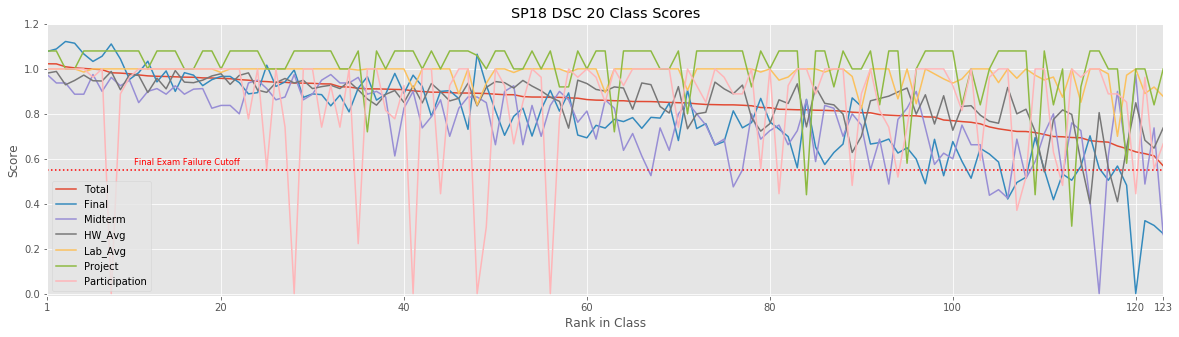

In [11]:
df.plot(figsize=(20,5))
plt.title('SP18 DSC 20 Class Scores')
plt.xlabel('Rank in Class')
plt.ylabel('Score')
plt.axhline(final_exam_cutoff, c='r', ls=':', lw=1.5)
plt.text(10.5, .575, 'Final Exam Failure Cutoff', color='r', size='small')
plt.axis([1,n,-.01,1.2])
plt.xticks(list(range(20,n,20)) + [1,n]);

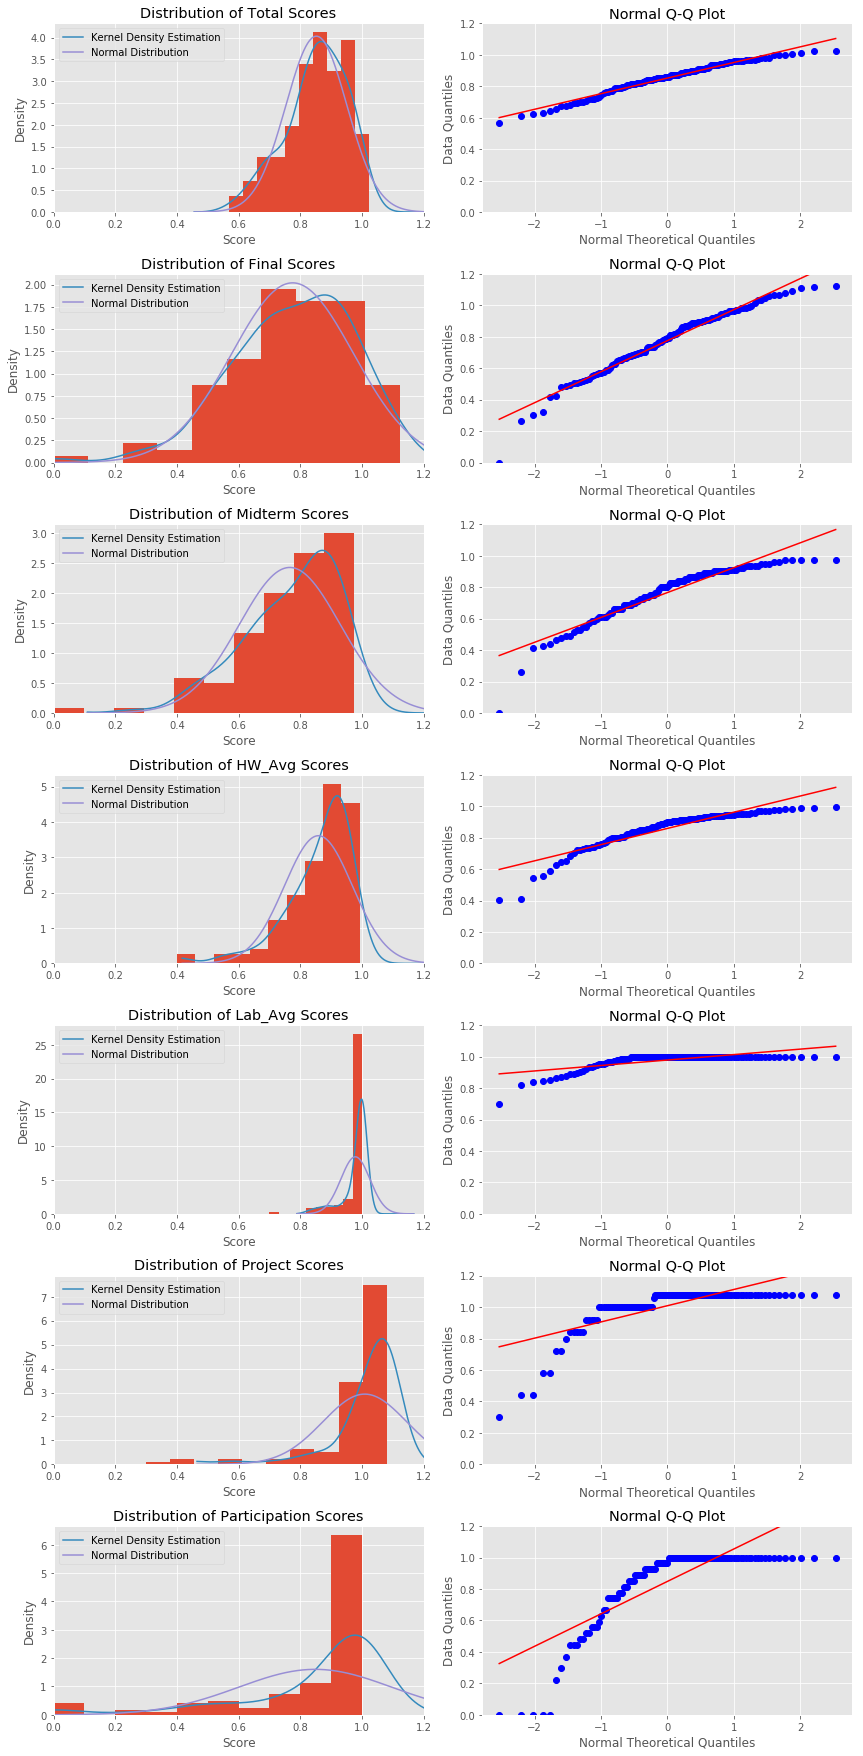

In [13]:
criteria = 'Total','Final','Midterm','HW_Avg','Lab_Avg','Project','Participation'
nrows = len(criteria)

plt.figure(figsize=(12,3.5*nrows))

for i, criterion in enumerate(criteria, 1):
    data = df[criterion]
    mean, sd = np.mean(data), np.std(data)
    
    # Histogram
    plt.subplot(nrows, 2, 2*i-1)
    data.hist(density=True)
    x = np.linspace(mean - 4*sd, mean + 4*sd, 1000)
    plt.plot(x, stats.gaussian_kde(data)(x), label='Kernel Density Estimation')
    plt.plot(x, stats.norm.pdf(x, loc=mean, scale=sd), label='Normal Distribution')
    plt.title('Distribution of {} Scores'.format(criterion))
    plt.xlabel('Score')
    plt.ylabel('Density')
    plt.xlim(0, 1.2)
    plt.legend(loc='upper left')

    # Q-Q Plot
    plt.subplot(nrows, 2, 2*i)
    stats.probplot(data, plot=plt)
    plt.title('Normal Q-Q Plot')
    plt.xlabel('Normal Theoretical Quantiles')
    plt.ylabel('Data Quantiles')
    plt.ylim([0,1.2])
    
plt.tight_layout()

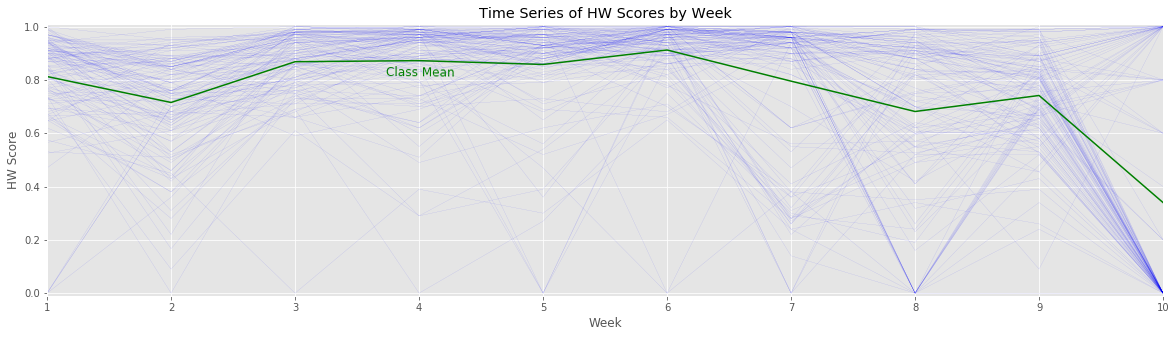

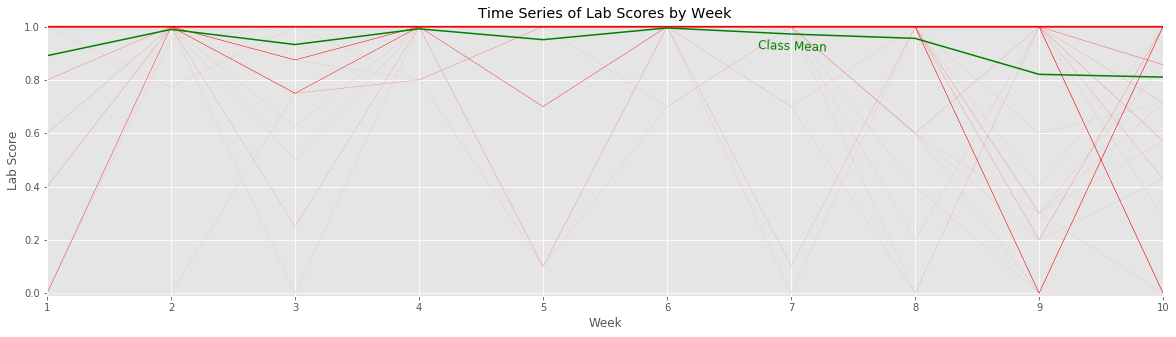

In [14]:
assignment_axes = [1,10,-.01,1.01]

hw_mean, lab_mean = tuple(map(np.mean, zip(*df['HW']))), tuple(map(np.mean, zip(*df['Lab'])))

texts = []
for assignment, color, mean in ('HW','b',hw_mean), ('Lab','r',lab_mean):
    plt.figure(figsize=(20,5))
    
    # All scores
    for row in range(n):
        plt.plot(weeks, df.iloc[row][assignment], color, lw=.05)
        
    # Averages (and associated labels)
    plt.plot(weeks, mean, 'g')
    texts.append(plt.text(0, 0, 'Class Mean', color='g', size='large'))
    
    plt.title('Time Series of {} Scores by Week'.format(assignment))
    plt.xlabel('Week')
    plt.ylabel('{} Score'.format(assignment))
    plt.axis([1,10,-.01,1.01])
    plt.xticks(weeks)
        
plt.setp(texts[0], x=3.73, y=.815, rotation=-.5)
plt.setp(texts[1], x=6.73, y=.918, rotation=-2);
#explain drops in scores, drops, non graded

In [15]:
hw_correlations = {}
for a, b in combinations(range(n), 2):
    hw_correlations[a, b] = stats.pearsonr(df.iloc[a]['HW'], df.iloc[b]['HW'])[0]
pairs = len(hw_correlations)
print('There are {} combinations of student pairings from the class of {} students.'.format(pairs, n))

There are 7503 combinations of student pairings from the class of 123 students.


Proof: $\binom{123}{2}=\frac{123!}{2!(123-2)!}=7503$.

In [16]:
df_hw = pd.DataFrame(list(hw_correlations.items()), columns=['Pairing','r'])
df_hw['HW']      = df_hw['Pairing'].apply(lambda pair: (df.iloc[pair[0]]['HW'], df.iloc[pair[1]]['HW']))
df_hw['Pairing'] = df_hw['Pairing'].apply(lambda pair: (df.iloc[pair[0]]['ID'], df.iloc[pair[1]]['ID']))
df_hw = df_hw[['r','Pairing','HW']].sort_values('r',ascending=False).reset_index(drop=True)
df_hw.index += 1
df_hw

,r,Pairing,HW
1,0.9970,"(alc643, vlg015)","((0.97, 0.85, 0.94, 0.96, 0.96, 0.9, 0.96, 0.88, 0.81, 0.0), (0.97, 0.87, 0.99, 0.97, 0.97, 0.97..."
2,0.9960,"(cepdvrrg, h4gldc)","((0.81, 0.88, 0.9, 0.99, 0.94, 0.97, 1.0, 1.0, 0.755, 0.0), (0.83, 0.93, 0.92, 0.99, 0.98, 1.0, ..."
3,0.9943,"(fdr.fkhqcl97, bxc530)","((0.92, 0.79, 1.0, 0.99, 1.0, 1.0, 1.0, 1.0, 0.92, 1.0), (0.9, 0.7, 0.99, 1.0, 0.99, 0.98, 1.0, ..."
4,0.9941,"(da005732, da005756)","((0.0, 0.7, 0.81, 0.97, 0.99, 1.0, 0.98, 0.94, 0.81, 1.0), (0.0, 0.7, 0.81, 0.98, 0.96, 0.91, 0...."
...,...,...,...
7500,-0.6799,"(gko011, lvuxelr)","((1.0, 0.95, 0.98, 0.92, 1.0, 1.0, 0.96, 0.99, 0.98, 1.0), (0.565, 0.68, 0.66, 0.84, 0.47, 0.0, ..."
7501,-0.7348,"(odpffduw, odc021)","((0.855, 0.87, 0.8, 0.97, 0.93, 0.89, 0.94, 0.94, 0.94, 1.0), (0.95, 0.51, 0.69, 0.0, 0.27, 0.75..."
7502,-0.7649,"(vjp002, lvuxelr)","((0.88, 0.76, 0.86, 0.9, 0.9, 1.0, 0.95, 0.97, 0.87, 1.0), (0.565, 0.68, 0.66, 0.84, 0.47, 0.0, ..."
7503,-0.8393,"(odpffduw, fueurgb)","((0.855, 0.87, 0.8, 0.97, 0.93, 0.89, 0.94, 0.94, 0.94, 1.0), (0.76, 0.65, 0.79, 0.49, 0.62, 0.7..."


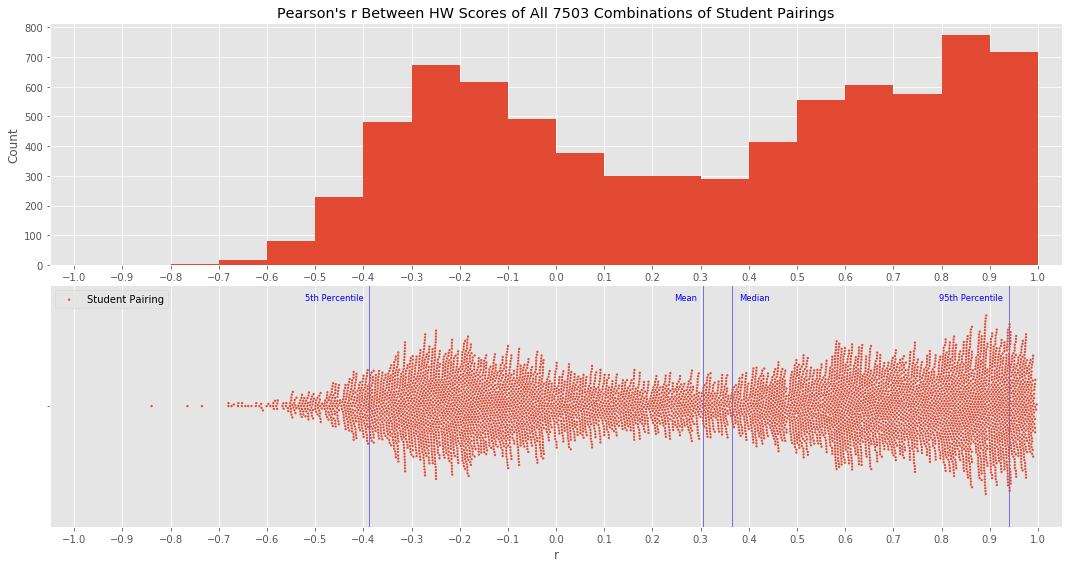

In [17]:
plt.figure(figsize=(15,8))
r = df_hw['r']
rrange = [-1.05,1.05]
rticks = np.arange(-1,1.1,.1)

plt.subplot(211)
plt.title("Pearson's r Between HW Scores of All {} Combinations of Student Pairings".format(pairs))
plt.hist(r, bins=rticks)
plt.ylabel('Count')
plt.xlim(rrange)
plt.xticks(rticks)

plt.subplot(212)
plt.xlabel("Pearson's r Between HW Scores of a Student Pairing")
sns.swarmplot(r, size=2.3, label='Student Pairing')
plt.xlim(rrange)
plt.xticks(rticks)
plt.legend()

measures = (
    ('Mean',  np.mean(r), .245),
    ('Median', np.median(r), .38),
    ('5th Percentile', np.percentile(r,5), -.52),
    ('95th Percentile', np.percentile(r,95), .795)
)

for measure in measures:
    plt.axvline(measure[1], c='b', lw=.5)
    plt.text(measure[2], -.44, measure[0], color='b', size='small')

plt.tight_layout(h_pad=0)

In [18]:
r_pos  = df_hw[:12], 'Strongest Positive', 'g', 1.02
r_avg  = df_hw.assign(ab=abs(r-np.mean(r))).sort_values('ab').drop('ab',axis=1)[:3], 'Most Typical', 'b', 1.08
r_weak = df_hw.assign(ab=abs(r)).sort_values('ab').drop('ab',axis=1)[:3], 'Weakest', 'y', 1.08
r_neg  = df_hw[::-1][:3], 'Strongest Negative', 'r', 1.08

for pairs, title, color, y in r_pos, r_avg, r_weak, r_neg:
    n_pairs = pairs.shape[0]
    plt.figure(figsize=(15,n_pairs))
    plt.suptitle("{} {} Correlations Between a Pairings' HW Scores".format(n_pairs, title), color=color, size=16, y=y)
    for pairing in range(n_pairs):
        pair = pairs.iloc[pairing]
        plt.subplot(nsubplots/3,3,pairing+1)
        plt.plot(weeks, pair['HW'][0], lw=1, label=pair['Pairing'][0])
        plt.plot(weeks, pair['HW'][1], lw=1, label=pair['Pairing'][1])
        plt.plot(weeks, hw_mean, 'g', lw=.2, label='Class Mean')

        plt.title('r = {} (#{})'.format(round(pair['r'],4), pair.name))
        plt.xlabel('Week')
        plt.ylabel('HW Score')
        plt.axis([1,10,-.01,1.02])
        plt.xticks(weeks)
        plt.legend(loc='lower left')   
    plt.tight_layout()

NameError: name 'nsubplots' is not defined

<Figure size 1080x864 with 0 Axes>

## Prediction

In [ ]:
# predict final: multiple linear regression, random forest

In [ ]:
X, y = df[['Midterm','HW_Avg','Lab_Avg','Project','Participation']], df['Final']

In [ ]:
model = LinearRegression()
results = model.fit(X, y)
print(model.intercept_, model.coef_)

In [ ]:
np.zeros((10, 2)).T

graph of scatterplot and correlations (heatmap)

In [ ]:
stats.pearsonr(df['Lab_Avg'], df['Final'])

In [ ]:
 sns.pairplot(df) # with correlations

(In fact when I was first generating models, I was wondering why my model was 100% accurate, even on separate training data. It's bc u can use components to calculate final exactly for data > predictors) Solve a linear system of equations

In [24]:
sm.OLS(df['Final'], sm.add_constant(df[['Midterm','HW_Avg','Lab_Avg','Project']])).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Final   R-squared:                       0.403
Model:                            OLS   Adj. R-squared:                  0.383
Method:                 Least Squares   F-statistic:                     19.90
Date:                Thu, 30 Aug 2018   Prob (F-statistic):           1.52e-12
Time:                        17:01:56   Log-Likelihood:                 56.722
No. Observations:                 123   AIC:                            -103.4
Df Residuals:                     118   BIC:                            -89.38
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.6555      0.327     -2.005      0.047      -1.303      -0.008
Midterm        0.5465      0.095      5.764      0.000       0.359       0.734
HW_Avg         0.3710      0.171      2.168      0.032       0.032       0.710
Lab_Avg        0.5076      0.353      1.437      0.153      -0.192       1.207
Project        0.1949      0.110      1.777      0.078      -0.022       0.412
==============================================================================
Omnibus:                       64.875   Durbin-Watson:                   1.449
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              385.275
Skew:                          -1.690   Prob(JB):                     2.18e-84
Kurtosis:                      10.984   Cond. No.                         70.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [26]:
# parsimmonous

In [25]:
# backward selection

In [22]:
# Assumptions
# Prediction intervals
sm.OLS(df['Final'], sm.add_constant(df[['Midterm','HW_Avg','Lab_Avg','Project','Participation']])).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Final   R-squared:                       0.404
Model:                            OLS   Adj. R-squared:                  0.378
Method:                 Least Squares   F-statistic:                     15.83
Date:                Thu, 30 Aug 2018   Prob (F-statistic):           6.86e-12
Time:                        16:14:05   Log-Likelihood:                 56.796
No. Observations:                 123   AIC:                            -101.6
Df Residuals:                     117   BIC:                            -84.72
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.6538      0.328     -1.993      0.049      -1.304      -0.004
Midterm           0.5509      0.096      5.746      0.000       0.361       0.741
HW_Avg            0.3741      0.172      2.175      0.032       0.033       0.715
Lab_Avg           0.4783      0.363      1.318      0.190      -0.241       1.197
Project           0.1971      0.110      1.788      0.076      -0.021       0.415
Participation     0.0221      0.059      0.375      0.709      -0.095       0.139
==============================================================================
Omnibus:                       62.687   Durbin-Watson:                   1.453
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              355.681
Skew:                          -1.637   Prob(JB):                     5.82e-78
Kurtosis:                      10.660   Cond. No.                         77.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Conditions:
- Linearity (Between Each Predictor and the Criterion)
- Normality (of Residuals)
- Homoscedasticity (of Residuals)

There must be a linear relationship between the outcome variable and the independent variables.  Scatterplots can show whether there is a linear or curvilinear relationship.
Multivariate Normality–Multiple regression assumes that the residuals are normally distributed.
No Multicollinearity—Multiple regression assumes that the independent variables are not highly correlated with each other.  This assumption is tested using Variance Inflation Factor (VIF) values.
Homoscedasticity–This assumption states that the variance of error terms are similar across the values of the independent variables.  A plot of standardized residuals versus predicted values can show whether points are equally distributed across all values of the independent variables.
Intellectus Statistics automatically includes the assumption tests and plots when conducting a regression.

1. narrow down variables
2. check assumptions